In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os

#needed to import utils.py
sys.path.append('../') 

import utils
import numpy as np
import pandas as pd

%matplotlib inline  

---
### Read patient data 

In [14]:
#set the data directory
data_dir = os.path.abspath('../03_preprocessed_data/')
    
#set the name of CSV file
data_file = f'{data_dir}/patient.csv'

#read data and show some info
df = utils.read_csv(data_file)

print(df.shape[0])

df.head()



#set the name of CSV file
data_file = f'{data_dir}/_patient.csv'

#read data and show some info
df_old = utils.read_csv(data_file)


utils.show_columns_stats(df)

5271
subject_id................ =  5271 rows (100.0%)     0 with NaN (  0.0%) Uniques=  5271 
Age....................... =  5271 rows (100.0%)     0 with NaN (  0.0%) Uniques=   189 
Sex....................... =  5271 rows (100.0%)     0 with NaN (  0.0%) Uniques=     2 
Symptoms_Onset_Delta...... =  5271 rows (100.0%)     0 with NaN (  0.0%) Uniques=  1319 
Diagnosis_Delta........... =  5271 rows (100.0%)     0 with NaN (  0.0%) Uniques=   962 
Site_Onset................ =  5271 rows (100.0%)     0 with NaN (  0.0%) Uniques=     4 
Diagnosis_Delay........... =  5271 rows (100.0%)     0 with NaN (  0.0%) Uniques=    70 
Age_at_Onset.............. =  5271 rows (100.0%)     0 with NaN (  0.0%) Uniques=     5 
Event_Dead................ =  5271 rows (100.0%)     0 with NaN (  0.0%) Uniques=     2 
Event_Dead_Time_from_Onset =  5271 rows (100.0%)     0 with NaN (  0.0%) Uniques=   111 
Riluzole.................. =  5271 rows (100.0%)     0 with NaN (  0.0%) Uniques=     2 
El_Escorial.....

Column Diagnosis_Delay  (5230 rows)   (DataType: float64)


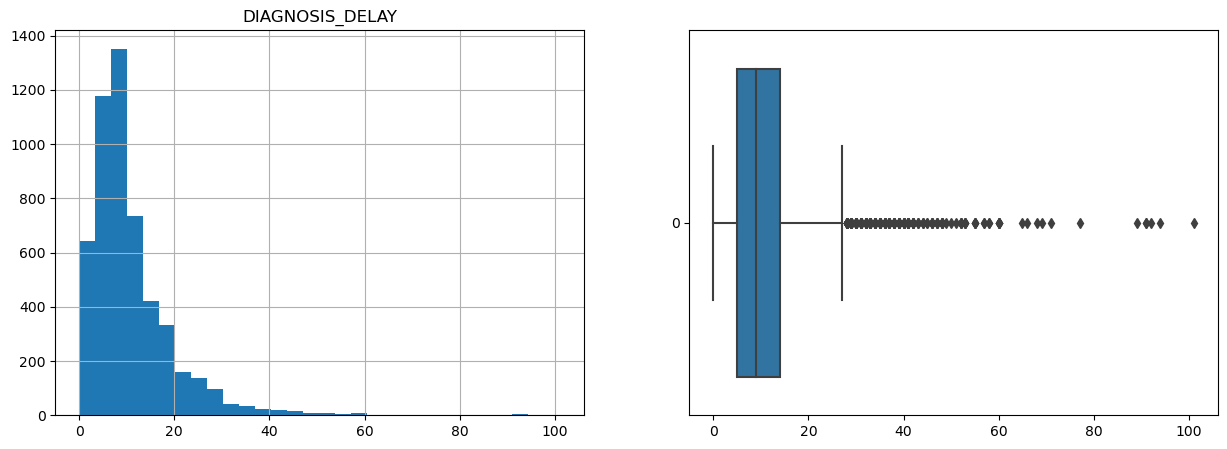

Column Diagnosis_Delay  (5271 rows)   (DataType: float64)


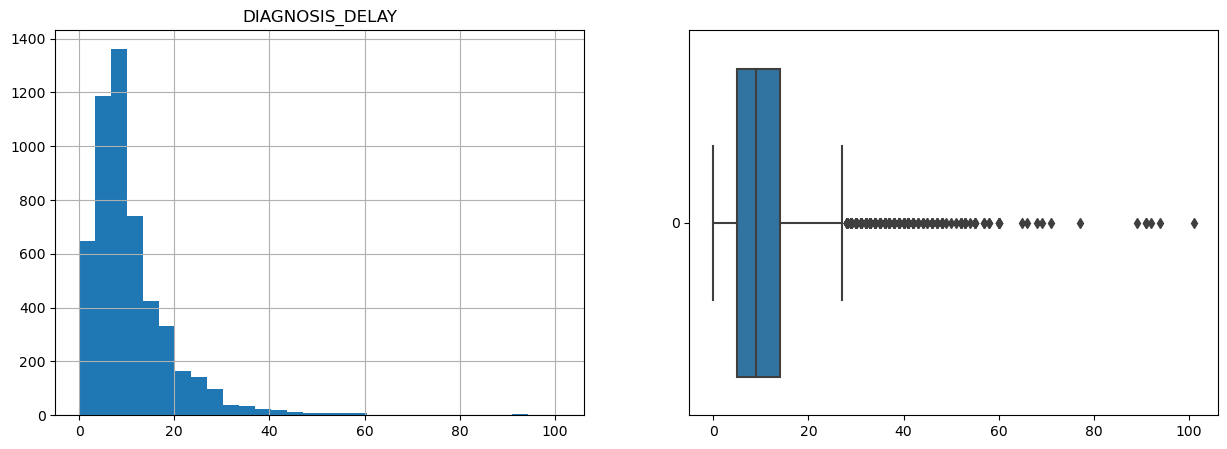

In [15]:
utils.plot_variable_distribution(df=df_old, column='Diagnosis_Delay', print_more_info=False)
utils.plot_variable_distribution(df=df, column='Diagnosis_Delay', print_more_info=False)

## Check missing value ratio for each column

In [17]:
df_missing = df.copy()

tot_rows = df_missing.shape[0]

cols_all = sorted(list(df_missing.columns))

cols_excluded = [
#     'Qty_Measurements_VITALSIGNS',
#     'Qty_Measurements_LABS',
#     'Qty_Measurements_HANDGRIPSTRENGTH',
#     'Qty_Measurements_MUSCLESTRENGTH',    
#     'Riluzole_Time_from_Onset',
#     'Height_in_Meters',
#     'Age_Range_at_Onset_Coded',
#     'Group_Survival_Coded',
#     'Diagnosis_Delay_Coded',
#     'Symptoms_Onset_Delta',
#     'Age_at_Onset',
#     'Diagnosis_Delta',
#     'Diagnosis_Delay'
]

cols_analyzed = list()

for c in cols_all:
    
    if (c == 'subject_id') or (c in cols_excluded):
        continue
    
    if c.startswith('Qty'):
        df_missing[c].replace(0, np.NaN, inplace=True)

    tot_with_zero = df_missing[c].value_counts(dropna=False).get(np.NaN)
        
    if tot_with_zero is None:
        tot_with_zero = 0
    
    if tot_with_zero > 0:
        print(f'{c:>27}: {tot_with_zero:>4} ({(tot_with_zero/tot_rows*100):>2.0f}%) samples with missing values ')

        cols_aux = cols_all.copy()
        cols_aux.remove(c)
        s = f'non NaNs:'
        print(f'   {s:>25} {tot_rows - tot_with_zero}')

    print()
    
    cols_analyzed.append(c)    
        

# utils.plot_nan_values_heatmap(df_missing[cols_analyzed])        









                El_Escorial: 1891 (36%) samples with missing values 
                   non NaNs: 3380



           Height_in_Meters: 1925 (37%) samples with missing values 
                   non NaNs: 3346







In [12]:
cols_dropna = [
    'Qty_Measurements_SVC',
    'Qty_Measurements_FVC',
    'Qty_Measurements_BMI',
    'Group_Survival',
#     'El_Escorial',
#     'Height_in_Meters',
]

df_complete_cases = df.dropna(subset=cols_dropna)
df_complete_cases = df_complete_cases.drop(columns=['Height_in_Meters'])
df_complete_cases

,subject_id,Sex,Qty_Measurements_ALSFRS,Qty_Measurements_VITALSIGNS,Qty_Measurements_FVC,Qty_Measurements_SVC,Qty_Measurements_LABS,Qty_Measurements_HANDGRIPSTRENGTH,Qty_Measurements_MUSCLESTRENGTH,Qty_Measurements,...,Age_Range_at_Onset,Age_Range_at_Onset_Coded,Event_Dead,Event_Dead_Time_from_Onset,Group_Survival,Group_Survival_Coded,Riluzole,Riluzole_Time_from_Onset,Qty_Measurements_BMI,El_Escorial
0,329,Female,12.0,13.0,8.0,0.0,465.0,0.0,0.0,498.0,...,0-39,0.0,False,65.0,Non-Short,0.0,False,56,10.0,NaN
1,348,Female,15.0,10.0,0.0,9.0,820.0,0.0,0.0,854.0,...,50-59,2.0,False,29.0,Non-Short,0.0,True,16,8.0,Probable Laboratory Supported
2,533,Female,6.0,10.0,2.0,6.0,126.0,0.0,0.0,150.0,...,60-69,3.0,False,46.0,Non-Short,0.0,False,33,7.0,Probable Laboratory Supported
4,708,Male,11.0,12.0,7.0,0.0,404.0,0.0,0.0,434.0,...,40-49,1.0,True,43.0,Non-Short,0.0,False,35,8.0,NaN
6,1064,Female,16.0,10.0,0.0,6.0,958.0,0.0,0.0,990.0,...,60-69,3.0,False,32.0,Non-Short,0.0,True,18,8.0,Definite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5217,859097,Male,15.0,0.0,0.0,12.0,466.0,20.0,160.0,673.0,...,70+,4.0,False,29.0,Non-Short,0.0,True,14,0.0,Probable
5218,957550,Female,7.0,0.0,0.0,8.0,380.0,14.0,175.0,584.0,...,40-49,1.0,False,50.0,Non-Short,0.0,True,35,0.0,Probable
5223,403761,Male,7.0,0.0,0.0,7.0,362.0,14.0,199.0,589.0,...,50-59,2.0,False,31.0,Non-Short,0.0,True,22,0.0,Possible
5226,160135,Female,7.0,0.0,0.0,6.0,365.0,14.0,189.0,581.0,...,60-69,3.0,False,25.0,Non-Short,0.0,False,21,0.0,Probable


### Check columns missingness ratio

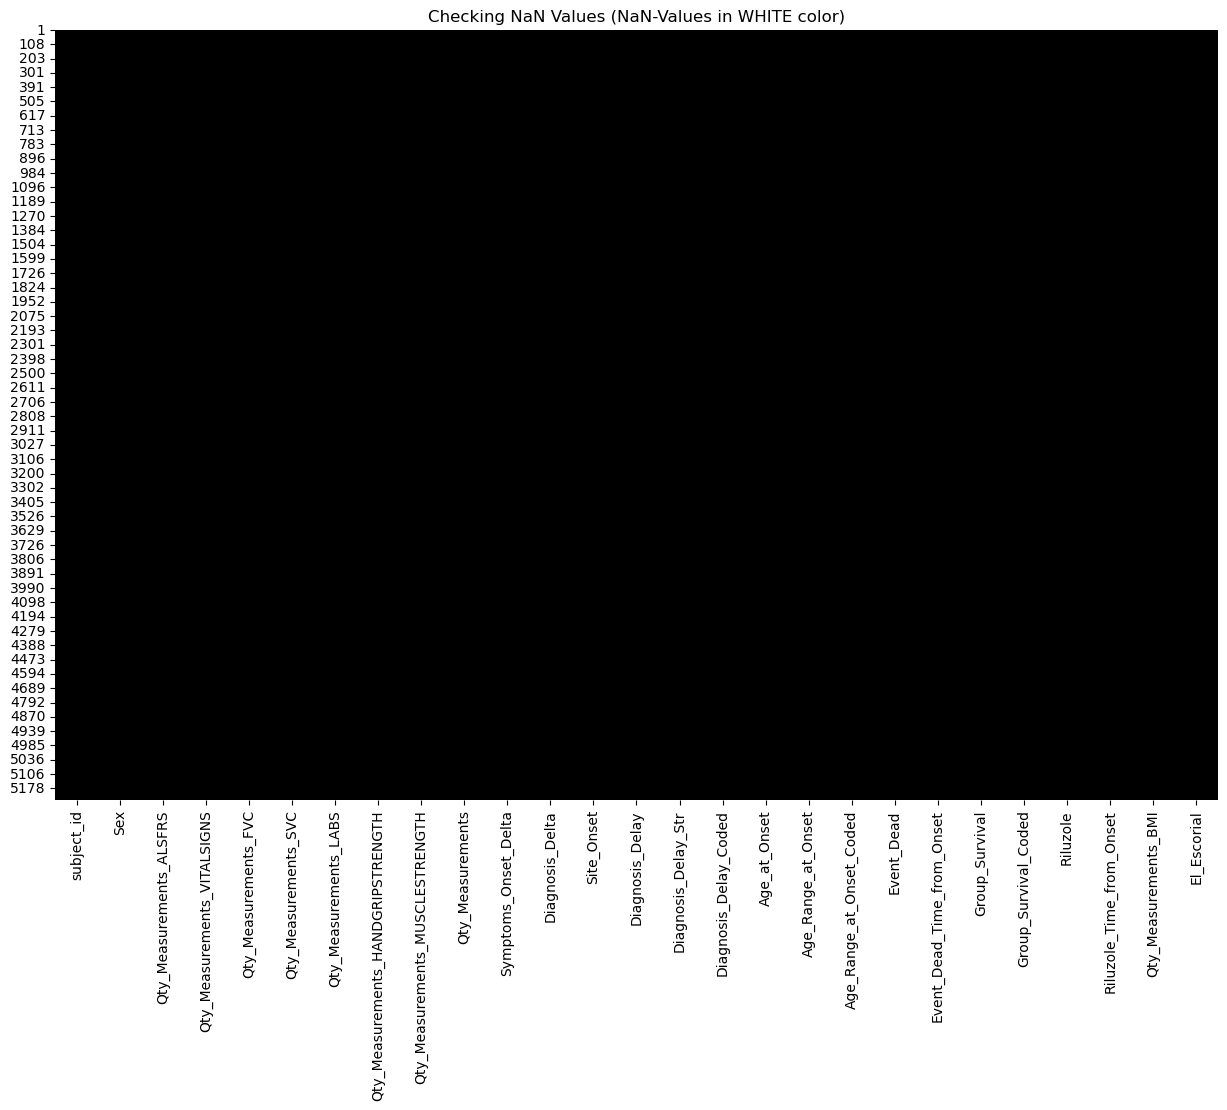

subject_id....................... =  2260 rows (100.0%)     0 with NaN (  0.0%) Uniques=  2260 
Sex.............................. =  2260 rows (100.0%)     0 with NaN (  0.0%) Uniques=     2 
Qty_Measurements_ALSFRS.......... =  2260 rows (100.0%)     0 with NaN (  0.0%) Uniques=    31 
Qty_Measurements_VITALSIGNS...... =  2260 rows (100.0%)     0 with NaN (  0.0%) Uniques=    55 
Qty_Measurements_FVC............. =  2260 rows (100.0%)     0 with NaN (  0.0%) Uniques=    19 
Qty_Measurements_SVC............. =  2260 rows (100.0%)     0 with NaN (  0.0%) Uniques=    17 
Qty_Measurements_LABS............ =  2260 rows (100.0%)     0 with NaN (  0.0%) Uniques=   807 
Qty_Measurements_HANDGRIPSTRENGTH =  2260 rows (100.0%)     0 with NaN (  0.0%) Uniques=    37 
Qty_Measurements_MUSCLESTRENGTH.. =  2260 rows (100.0%)     0 with NaN (  0.0%) Uniques=   276 
Qty_Measurements................. =  2260 rows (100.0%)     0 with NaN (  0.0%) Uniques=   917 
Symptoms_Onset_Delta............. =  226

In [160]:
utils.plot_nan_values_heatmap(df_complete_cases, title='Checking NaN Values (NaN-Values in WHITE color)')
utils.show_columns_stats(df_complete_cases, df_complete_cases.columns)

Column: Event_Dead_Time_from_Onset  (DataType: float64)
N         = 1435 [Non-NaN: 1435]
Missingness: 0 (0.0%)
Min       = 3.00  
Max       = 24.00  
SE / Std  = 4.50  (Standard Error or Std.Dev.)
SEM       = 0.12  (Standard Error of the Mean) [Formula: Std.Dev/sqrt(N) => 4.50/sqrt(1435)] 
Mean      = 18.16 +/- 4.50 (Std.Dev.) [Precision of the Mean = 18.16 +/- 0.12 (SEM)] 
Median    = 19.00  
Mode      = 19.0
Variance  = 20.23 (Coefficient of Variation = 0.25)
Skewness  = -0.76 (Left-Skewed) (Moderately Skewed) 
Kurtosis  = -0.05 (platykurtic, rounded appearance)(PS: a high kurtosis indicates too many outliers) 
Quartiles = [Q1: 25% < 15.00]   [Q2: 50% < 19.00]   [Q3: 75% < 22.00]
 -IQR     = 7.000 (Interquartile Range: IQR = Q3-Q1)
 -Outliers Threshold (IQR * +/-1.5):  [Lower = 4.500]   [Upper = 24.000]


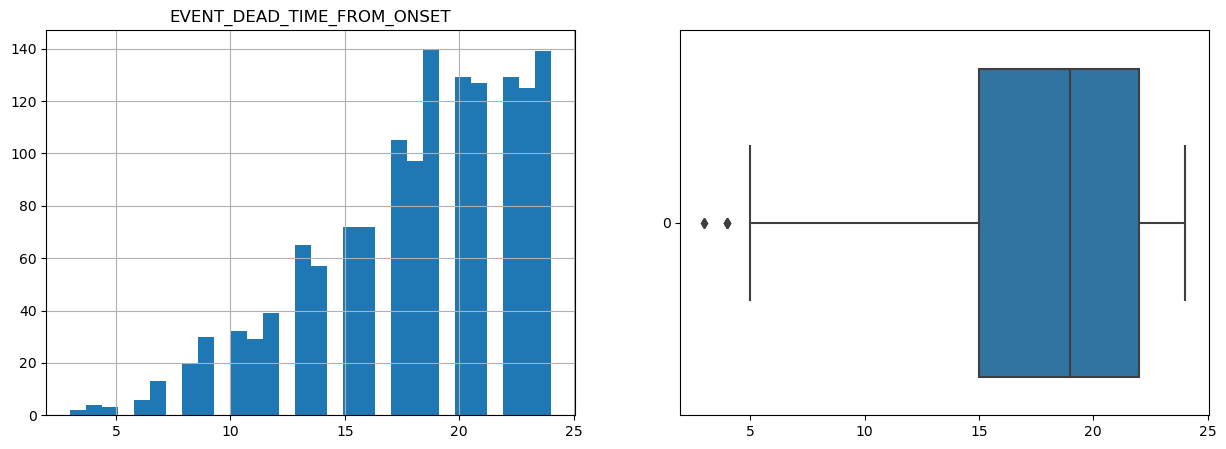

Column: Event_Dead  (DataType: bool)
N         = 1435 [Non-NaN: 1435]
Missingness: 0 (0.0%)

Summary Table:
       count percentage
False   1435    100.00%


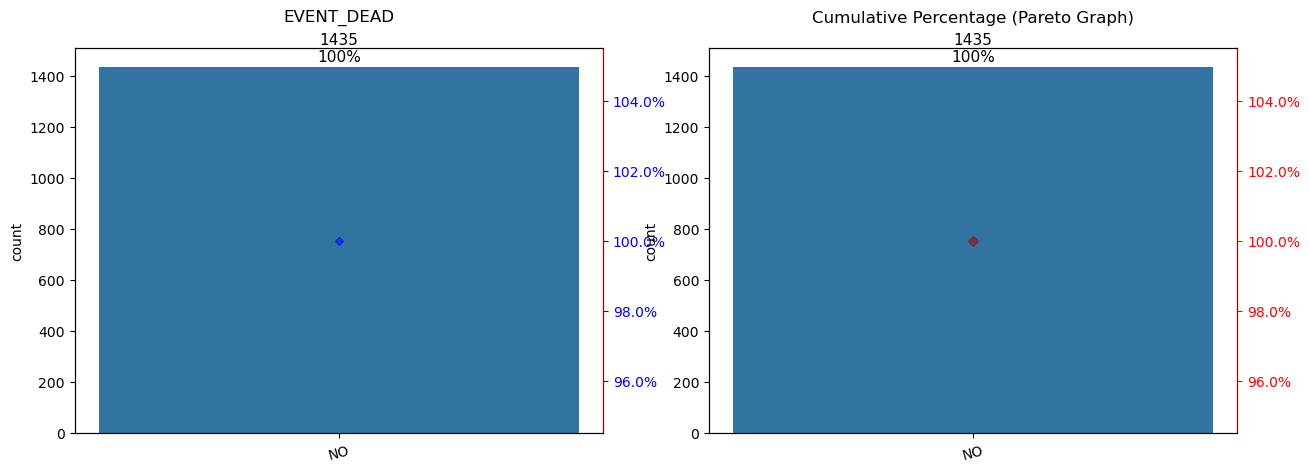

Column: Group_Survival  (DataType: object)
N         = 3795 [Non-NaN: 3795]
Missingness: 0 (0.0%)

Summary Table:
           count percentage
Non-Short   3279     86.40%
Short        516     13.60%


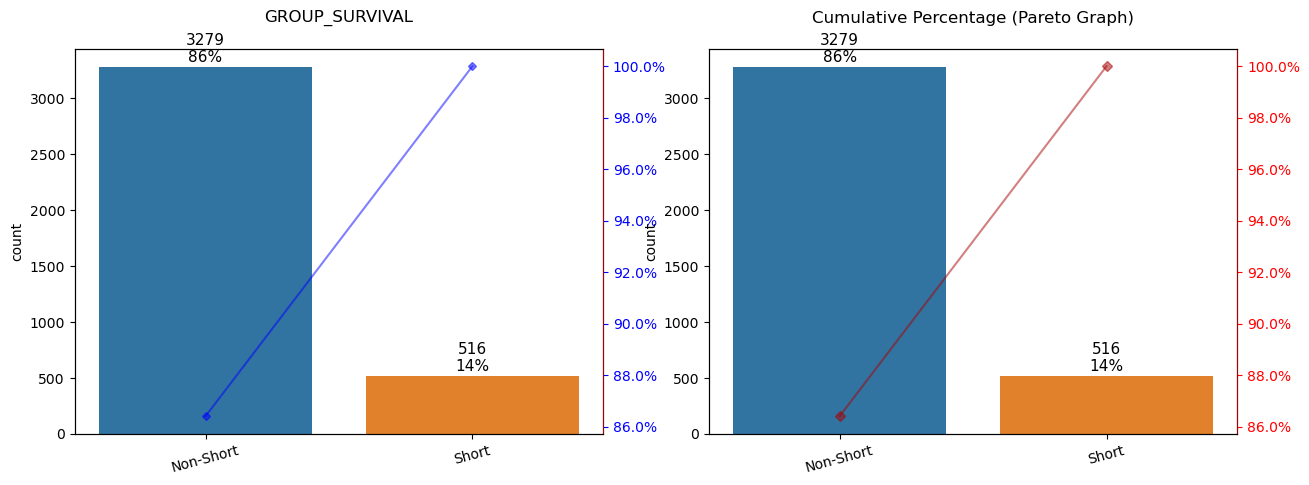

In [132]:
to_plot = df.loc[(df.Group_Survival).isnull()].copy()
utils.plot_variable_distribution(df=to_plot, column='Event_Dead_Time_from_Onset')
utils.plot_variable_distribution(df=to_plot, column='Event_Dead')


to_plot = df.loc[(df.Group_Survival).isnull()==False].copy()
utils.plot_variable_distribution(df=to_plot, column='Group_Survival')

### Plot HeatMap showing NaN values per column (White color means NaN values)

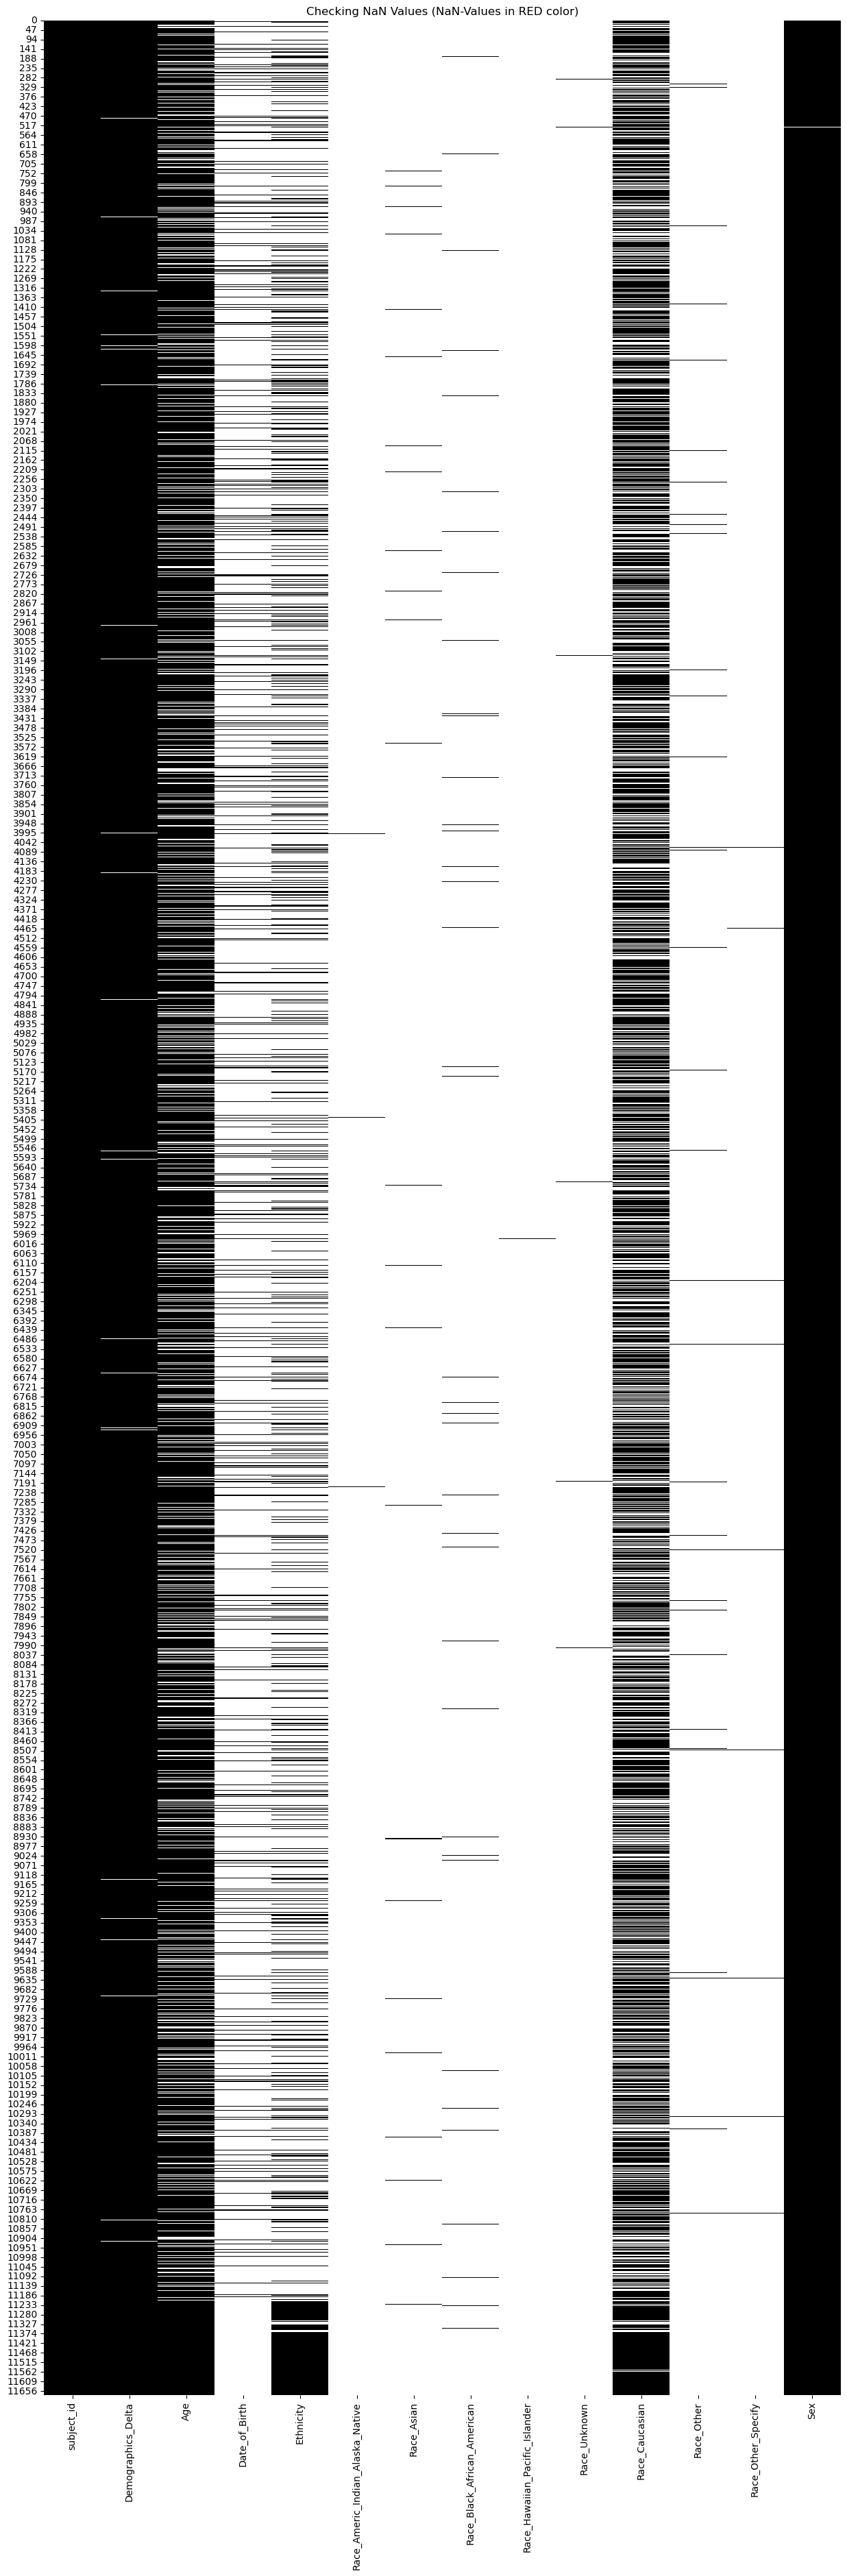

In [15]:
# plot HeatMap of NaN values for all columns
utils.plot_nan_values_heatmap(data=df, title='Checking NaN Values (NaN-Values in WHITE color)', 
                              cbar=False, figsize=[15, 45] )

----
----
----
## Remove rows with NaN in the AGE and SEX columns

In [20]:
# AGE column
to_delete = df.loc[(df.Age.isnull())]
df = utils.remove_rows(df=df, to_delete=to_delete)


# SEX column
to_delete = df.loc[(df.Sex.isnull())]
df = utils.remove_rows(df=df, to_delete=to_delete)

df


  - Previous=11675, To delete=2077, After=9598
  - Previous=9598, To delete=0, After=9598


,subject_id,Age,Sex
1,329,38.0,Female
2,348,52.0,Female
5,533,65.0,Female
6,586,63.0,Male
7,649,48.0,Female
...,...,...,...
11670,22564,63.0,Male
11671,160135,67.0,Female
11672,304192,59.0,Female
11673,820199,49.0,Male


----
----
----
## Save the pre-processed data to CSV file

In [29]:
# dir_dest = os.path.abspath('../03_preprocessed_data/')
# csv_dest = f'{dir_dest}/_patient.csv'
# utils.save_to_csv(df=df_to_save, csv_file=csv_dest)


7712 samples were saved
